In [1]:
import tensorflow as tf

C:\Users\Ryoji Nomura\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
g = tf.Graph()
with g.as_default():
    x = tf.placeholder(dtype=tf.float32, shape=(None), name='x')
    w = tf.Variable(2.0, name='weight')
    b = tf.Variable(0.7, name='bias')
    z = w * x + b
    init = tf.global_variables_initializer()

In [10]:
with tf.Session(graph=g) as sess:
    sess.run(init)
    for t in [1.0, 0.6, -1.8]:
        print('x=%4.1f --> z=%4.1f' % (t, sess.run(z, feed_dict={x:t})) )

x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


In [14]:
import tensorflow as tf
import numpy as np
g = tf.Graph()
with g.as_default():
    x = tf.placeholder(dtype=tf.float32, shape=(None, 2, 3),name='input_x')
    x2 = tf.reshape(x, shape=(-1, 6), name='x2')
    xsum = tf.reduce_sum(x2, axis=0, name='col_sum')
    xmean = tf.reduce_mean(x2, axis=0, name='col_mean')

In [15]:
with tf.Session(graph=g) as sess:
    X_array = np.arange(18).reshape(3, 2, 3)
    print('input shape: ', X_array.shape)
    print('Reshaped: ', sess.run(x2, feed_dict={x:X_array}))
    print('Column Sums:', sess.run(xsum, feed_dict={x:X_array}))
    print('Column Means:', sess.run(xmean, feed_dict={x:X_array}))

input shape:  (3, 2, 3)
Reshaped:  [[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]]
Column Sums: [18. 21. 24. 27. 30. 33.]
Column Means: [ 6.  7.  8.  9. 10. 11.]


In [34]:
class TfLinreg(object):
    def __init__(self, x_dim, learning_rate=0.01, random_seed=0):
        self.x_dim = x_dim
        self.learning_rate = learning_rate
        self.g = tf.Graph()
        
        with self.g.as_default():
            tf.set_random_seed(random_seed)
            self.build()
            self.init_op = tf.global_variables_initializer()
            
    def build(self):
        self.X = tf.placeholder(dtype=tf.float32, shape=(None, self.x_dim), name='x_input')
        self.y = tf.placeholder(dtype=tf.float32, shape=(None), name='y_input')
        print(self.X)
        print(self.y)
        
        w = tf.Variable(tf.zeros(shape=(1)), name='weight')
        b = tf.Variable(tf.zeros(shape=(1)), name='bias')
        print(w)
        print(b)
        
        self.z_net = tf.squeeze(w * self.X + b, name='z_net')
        print(self.z_net)
        
        sqr_error = tf.square(self.y - self.z_net, name='sqr_error')
        print(sqr_error)
        self.mean_cost = tf.reduce_mean(sqr_error, name='mean_cost')
        print(self.mean_cost)
        
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=self.learning_rate, name='GradientDescent')
        self.optimizer = optimizer.minimize(self.mean_cost)
        

In [35]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1., 1.3, 3.1, 2., 5., 6.3, 6.6, 7.4, 8., 9.])
lrmodel = TfLinreg(x_dim=X_train.shape[1])

Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_error:0", dtype=float32)
Tensor("mean_cost:0", shape=(), dtype=float32)


In [36]:
def train_linreg(sess, model, X_train, y_train, num_epochs=10):
    sess.run(model.init_op)
    training_cost = []
    for i in range(num_epochs):
        _, cost = sess.run([model.optimizer, model.mean_cost], feed_dict={model.X:X_train, model.y:y_train})
        training_cost.append(cost)
    return training_cost


In [37]:
sess = tf.Session(graph=lrmodel.g)
training_costs = train_linreg(sess, lrmodel, X_train, y_train)

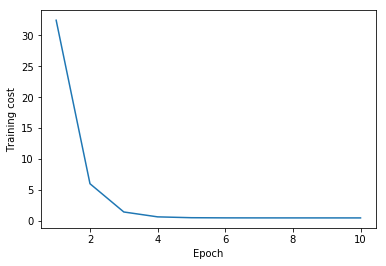

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, len(training_costs)+1), training_costs)
plt.xlabel('Epoch')
plt.ylabel('Training cost')
plt.show()

In [39]:
def predict_linreg(sess, model, X_test):
    y_pred = sess.run(model.z_net, feed_dict={model.X:X_test})
    return y_pred

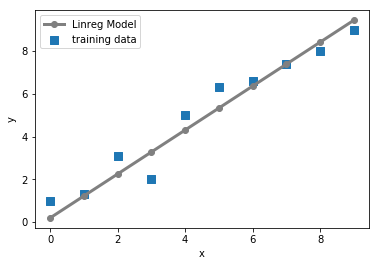

In [40]:
plt.scatter(X_train, y_train, marker='s', s=50, label='training data')
plt.plot(range(X_train.shape[0]), predict_linreg(sess, lrmodel, X_train), c='gray', marker='o', markersize=6, lw=3, label='Linreg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()